## Step 1: Import Libraries

We start by importing all required libraries for the analysis:

- **Core**: `numpy`, `pandas`, `seaborn`, `matplotlib`, `scipy`  
- **Clustering**: K-Means, Agglomerative Clustering, Spectral Clustering, Silhouette Score  
- **Dimensionality Reduction**: Principal Component Analysis (PCA)  
- **Predictive Models**: Logistic Regression, Random Forest, XGBoost, Multi-Layer Perceptron (MLP)  
- **Evaluation Metrics**: Precision, Recall, F1 Score, ROC-AUC, Confusion Matrix, ROC Curve  
- **Visualization**: Plotly (interactive charts), Matplotlib (static plots), 3D plotting tools  

These libraries cover the full workflow of the thesis:  
1. Data exploration and visualization  
2. Clustering analysis  
3. Correlation analysis  
4. Predictive modeling  
5. Model evaluation and interpretation


In [2]:
# Core
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import scipy.cluster.hierarchy as sch

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)

# Visualization
import plotly.figure_factory as ff
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

## Step 2: Exploratory Data Analysis (EDA) – Basic Dataset Overview

In this step, we perform a first inspection of the dataset:

- **Load dataset**: Read the Excel file `307.xlsx` into a pandas DataFrame.  
- **Preview data**: Use `.head()` and `.describe()` to see the structure, distributions, and summary statistics.  
- **Number of participants**: Count total survey respondents.  
- **Gender distribution**:  
  - Map `SEX` variable into labels (`0 = Women`, `1 = Men`).  
  - Show counts and percentages for both genders.  
- **Country distribution**:  
  - Map `COUNTRY` variable into labels (`0 = United States`, `1 = United Kingdom`).  
  - Show counts and percentages for both countries.  
- **Age statistics**: Summary statistics for age variable.  
- **Data cleaning**:  
  - Drop last 3 rows (irrelevant).  
  - Replace string `"na"` with proper `NaN`.  
- **Missing values**: Display number of missing values per column (only for columns with missing data).  

This provides an overview of the dataset structure, demographics of participants, and prepares the data for further analysis.

In [4]:
# Read the data set
df = pd.read_excel('307.xlsx')

In [5]:
df.head()

Response_ID  PINV1  PINV2  PINV3  PINV4  PINV_av  ANONYM1  ANONYM2_r  \
0          17    2.0    5.0    6.0    7.0     5.00      3.0        5.0   
1          18    5.0    7.0    6.0    7.0     6.25      2.0        5.0   
2          19    2.0    2.0    2.0    4.0     2.50      2.0        5.0   
3          21    4.0    5.0    5.0    5.0     4.75      3.0        5.0   
4          22    3.0    3.0    5.0    6.0     4.25      3.0        5.0   

   ANONYM2_s  ANONYM3_r  ...  SAT1  SAT2  SAT3  GUIT1  GUIT2  GUIT3  GUIT4  \
0        3.0        6.0  ...     7     6     7      1      5      3      1   
1        3.0        5.0  ...     6     6     5      2      1      1      1   
2        3.0        5.0  ...     2     2     4      1      1      1      1   
3        3.0        5.0  ...     4     4     4      4      5      4      4   
4        3.0        5.0  ...     3     5     5      1      1      1      1   

    AGE  SEX  COUNTRY  
0  39.0  1.0      0.0  
1  39.0  1.0      1.0  
2  32.0  0.0      1.0  
3  68.0  0.0      1.0  
4  59.0  1.0      1.0  

[5 rows x 86 columns]

In [6]:
df.describe()

PINV1       PINV2       PINV3       PINV4     PINV_av     ANONYM1  \
count  307.000000  307.000000  307.000000  307.000000  310.000000  307.000000   
mean     3.172638    3.612378    4.771987    4.762215    4.071470    3.312704   
std      1.542270    1.657694    1.594557    1.522856    1.328838    1.461913   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    2.000000    4.000000    4.000000    3.250000    2.000000   
50%      3.000000    4.000000    5.000000    5.000000    4.250000    3.000000   
75%      4.000000    5.000000    6.000000    6.000000    5.000000    4.000000   
max      7.000000    7.000000    7.000000    7.000000    7.000000    7.000000   

        ANONYM2_r   ANONYM2_s   ANONYM3_r   ANONYM3_s  ...  \
count  307.000000  307.000000  307.000000  307.000000  ...   
mean     4.957655    3.042345    4.915309    3.084691  ...   
std      1.242559    1.242559    1.270322    1.270322  ...   
min      1.000000    1.000000    1.000000    1.000000  ...   
25%      4.000000    2.000000    4.000000    2.000000  ...   
50%      5.000000    3.000000    5.000000    3.000000  ...   
75%      6.000000    4.000000    6.000000    4.000000  ...   
max      7.000000    7.000000    7.000000    7.000000  ...   

       NEGAFF3_distressed_r  NEGAFF3_distressed_s  NEGAFF4_afraid_r  \
count            307.000000            307.000000        307.000000   
mean               2.798046              5.201954          2.856678   
std                1.618398              1.618398          1.654558   
min                1.000000              1.000000          1.000000   
25%                1.000000              4.000000          1.000000   
50%                3.000000              5.000000          3.000000   
75%                4.000000              7.000000          4.000000   
max                7.000000              7.000000          7.000000   

       NEGAFF4_afraid_s      EMPOW1      EMPOW2      EMPOW3         AGE  \
count        307.000000  307.000000  307.000000  307.000000  307.000000   
mean           5.143322    4.433225    4.159609    4.342020   41.736156   
std            1.654558    1.470162    1.526647    1.566696   12.955887   
min            1.000000    1.000000    1.000000    1.000000   18.000000   
25%            4.000000    3.500000    3.000000    3.000000   32.000000   
50%            5.000000    5.000000    4.000000    5.000000   39.000000   
75%            7.000000    5.500000    5.000000    5.000000   51.500000   
max            7.000000    7.000000    7.000000    7.000000   80.000000   

              SEX     COUNTRY  
count  307.000000  307.000000  
mean     0.524430    0.553746  
std      0.500218    0.497915  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      1.000000    1.000000  
75%      1.000000    1.000000  
max      1.000000    1.000000  

[8 rows x 71 columns]

In [7]:
#Number of participants
len(df)

310

In [8]:
# Map 0 -> Women, 1 -> Men
df['gender_label'] = df['SEX'].map({0: 'Women', 1: 'Men'})

# Gender distribution (counts)
df['gender_label'].value_counts()

# Gender distribution (percentages)
df['gender_label'].value_counts(normalize=True) * 100

gender_label
Men      52.442997
Women    47.557003
Name: proportion, dtype: float64

In [9]:
# Map 0 -> Unites States, 1 -> United Kingdom
df['country_label'] = df['COUNTRY'].map({0: 'Unites States', 1: 'United Kingdom'})

# Country distribution (counts)
df['country_label'].value_counts()

# Country distribution (percentages)
df['country_label'].value_counts(normalize=True) * 100

country_label
United Kingdom    55.374593
Unites States     44.625407
Name: proportion, dtype: float64

In [10]:
# Quick statistics for age
df['AGE'].describe()

count    307.000000
mean      41.736156
std       12.955887
min       18.000000
25%       32.000000
50%       39.000000
75%       51.500000
max       80.000000
Name: AGE, dtype: float64

In [11]:
#Dropping last 3 rows, we don't need them
df = df.drop(df.tail(3).index)

In [12]:
#Replacing string 'na' to NaN
df = df.replace("na", np.nan)

/var/folders/9b/sgc5xlc54js50h7m2vx4f06c0000gn/T/ipykernel_16719/2389938884.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("na", np.nan)


In [13]:
#Show only columns that have missing values (clean view)
miss = df.isnull().sum()
miss[miss > 0].sort_values(ascending=False)

GUIT2    51
GUIT4    51
GUIT1    50
GUIT3    50
SAT1     42
SAT2     42
SAT3     42
ENJ2     40
ENJ1     39
ENJ3     39
SMUG1    38
SMUG2    38
SMUG3    38
SMUG4    38
dtype: int64

## Step 3: Composite Variable Construction

The survey items are grouped into thematic constructs (composites) by averaging related questions:

- **Privacy Invasion (`PINV_av`)**: 4 items measuring perceived invasion of privacy.  
- **Anonymity (`anonymity_score`)**: 4 items (some reverse-coded) measuring perceived online anonymity.  
- **Trust (`TRUST_av`)**: 4 items capturing cynicism and distrust in online service providers.  
- **False Information Sharing (`FALS_av`)**: 4 items measuring frequency of providing misleading or false data.  
- **Privacy Tools Usage (`TOOLS_av`)**: 5 items about the use of privacy tools (VPN, blocking, settings adjustments).  
- **Positive Emotions (`EMO_POS_av`)**: 4 items capturing positive affect (happy, excited, enthusiastic, inspired).  
- **Negative Emotions (`EMO_NEG_av`)**: 4 items capturing negative affect (sad, irritable, distressed, afraid).  
- **Discontinuation Intention (`DISCONT_av`)**: 4 items indicating likelihood of service discontinuation (proxy for churn).  

### Processing steps
1. Convert all relevant survey items to numeric (safe casting with `errors='coerce'` to handle invalid values).  
2. Compute composite scores as **row-wise means** for each construct.  
3. Store results in a dedicated analysis dataframe (`analysis_df`).  
4. Perform a **correlation analysis** between all composites to explore their interrelationships.  

The correlation heatmap provides a first look at how privacy attitudes, trust, emotions, and protective strategies relate to churn intention.

In [15]:
PINV_items   = ['PINV1','PINV2','PINV3','PINV4'] # Privacy invasion (recoded)
ANON_items   = ['ANONYM1','ANONYM2_r','ANONYM3_r','ANONYM4'] # Anonymity (recoded as needed)
TRUST_items  = ['CYN1','CYN2','CYN3','CYN4'] # Trust
FALS_items   = ['PLIES1','PLIES2','PLIES3','PLIES4'] # False information sharing
TOOLS_items  = ['MODIF1','MODIF2','MODIF3','MODIF4','MODIF5'] # Privacy tools usage
EMO_POS_items = ['POSAFF1_happy','POSAFF2_excited','POSAFF3_enthus','POSAFF4_inspired']  # Positive emotions 
EMO_NEG_items = ['NEGAFF1_sad_r','NEGAFF2_irrit_r','NEGAFF3_distressed_r','NEGAFF4_afraid_r'] # Negative emotions
DISC_items   = ['DISCONT1','DISCONT2','DISCONT3','DISCONT4'] # Discontinuation / churn intention

In [16]:
# Ensure numeric dtype for all involved items (safe casting)
for cols in [PINV_items, ANON_items, TRUST_items, FALS_items, TOOLS_items, EMO_POS_items, EMO_NEG_items, DISC_items]:
    for c in cols:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Compute composites as row-wise means 
df['PINV_av']        = df[PINV_items].mean(axis=1)
df['anonymity_score'] = df[ANON_items].mean(axis=1)
df['TRUST_av']       = df[TRUST_items].mean(axis=1)
df['FALS_av']        = df[FALS_items].mean(axis=1)
df['TOOLS_av']       = df[TOOLS_items].mean(axis=1)
df['EMO_POS_av']     = df[EMO_POS_items].mean(axis=1)
df['EMO_NEG_av']     = df[EMO_NEG_items].mean(axis=1)
df['DISCONT_av']     = df[DISC_items].mean(axis=1)

# Quick check
df[['PINV_av','anonymity_score','TRUST_av','FALS_av','TOOLS_av','EMO_POS_av','EMO_NEG_av','DISCONT_av']].head()

PINV_av  anonymity_score  TRUST_av  FALS_av  TOOLS_av  EMO_POS_av  \
0     5.00             4.25      2.00     2.00       5.6        3.25   
1     6.25             3.75      6.75     3.75       6.2        1.50   
2     2.50             3.50      3.75     3.00       3.8        4.00   
3     4.75             4.00      4.50     2.00       4.6        4.00   
4     4.25             4.00      4.00     2.00       3.8        1.50   

   EMO_NEG_av  DISCONT_av  
0        2.75        3.75  
1        5.50        3.75  
2        4.00        3.25  
3        4.75        2.00  
4        1.25        3.75

In [17]:
# Making a copy of a table that we will analyze
analysis_df = df[['PINV_av','anonymity_score','TRUST_av',
                  'FALS_av','TOOLS_av','EMO_POS_av','EMO_NEG_av','DISCONT_av']].copy()

In [18]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PINV_av          307 non-null    float64
 1   anonymity_score  307 non-null    float64
 2   TRUST_av         307 non-null    float64
 3   FALS_av          307 non-null    float64
 4   TOOLS_av         307 non-null    float64
 5   EMO_POS_av       307 non-null    float64
 6   EMO_NEG_av       307 non-null    float64
 7   DISCONT_av       307 non-null    float64
dtypes: float64(8)
memory usage: 19.3 KB


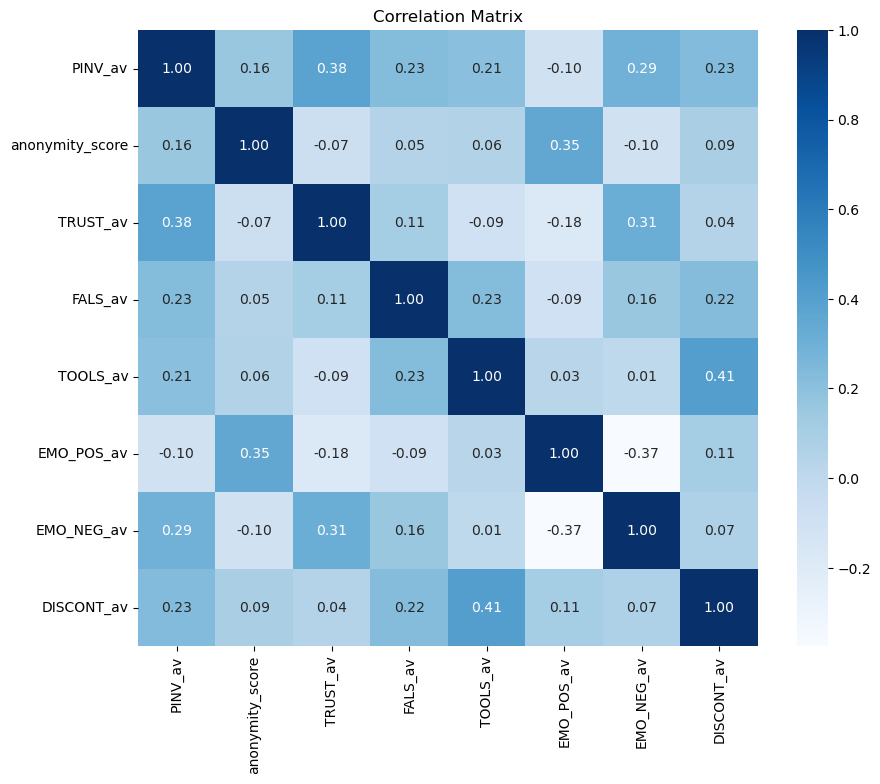

In [19]:
# Correlation Matrix 
plt.figure(figsize=(10,8))
sns.heatmap(analysis_df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [20]:
print(analysis_df.corr())

                  PINV_av  anonymity_score  TRUST_av   FALS_av  TOOLS_av  \
PINV_av          1.000000         0.160226  0.383866  0.230665  0.205692   
anonymity_score  0.160226         1.000000 -0.073620  0.048897  0.059459   
TRUST_av         0.383866        -0.073620  1.000000  0.110729 -0.090433   
FALS_av          0.230665         0.048897  0.110729  1.000000  0.227272   
TOOLS_av         0.205692         0.059459 -0.090433  0.227272  1.000000   
EMO_POS_av      -0.099354         0.350630 -0.176120 -0.092299  0.028867   
EMO_NEG_av       0.292144        -0.102976  0.314691  0.159490  0.006340   
DISCONT_av       0.232671         0.089215  0.044857  0.221821  0.413041   

                 EMO_POS_av  EMO_NEG_av  DISCONT_av  
PINV_av           -0.099354    0.292144    0.232671  
anonymity_score    0.350630   -0.102976    0.089215  
TRUST_av          -0.176120    0.314691    0.044857  
FALS_av           -0.092299    0.159490    0.221821  
TOOLS_av           0.028867    0.006340    0.

## Step 4: Clustering Analysis

To segment users into distinct groups, we apply clustering algorithms on the scaled dataset.  
Since the original variables have different scales, we first standardize them using **StandardScaler**.

### Step 4.1: K-Means – Determining Optimal k
- **Elbow Method**: plots the inertia (within-cluster sum of squares) for different values of k.  
  The "elbow point" suggests the optimal number of clusters.  
- **Silhouette Score**: measures how well-separated the clusters are, ranging from -1 (poor) to +1 (ideal).  

### Step 4.2: Gap Statistic
- Compares the inertia of the real data against multiple random reference datasets.  
- A larger gap value indicates that the chosen k provides better clustering than random chance.  

### Step 4.3: Agglomerative Clustering
- Hierarchical approach where clusters are formed bottom-up.  
- Evaluated using silhouette scores for k = 2 to 10.  
- **Dendrogram** visualization shows how observations merge at different distances.  

### Step 4.4: Spectral Clustering
- Graph-based clustering method using nearest-neighbors similarity.  
- Evaluated with silhouette scores for different k.  

### Step 4.5: Final Cluster Assignment
Based on the combined quality metrics (Elbow, Silhouette, Gap Statistic, and dendrogram),  
we select **k = 3** as the optimal number of clusters.  
The final cluster labels are stored in the dataframe under the column `cluster`.

In [22]:
# Standardize all features so that variables are comparable for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(analysis_df)

In [23]:
# Compute K-Means inertia (within-cluster sum of squares) for k = 2 to 10 clusters
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

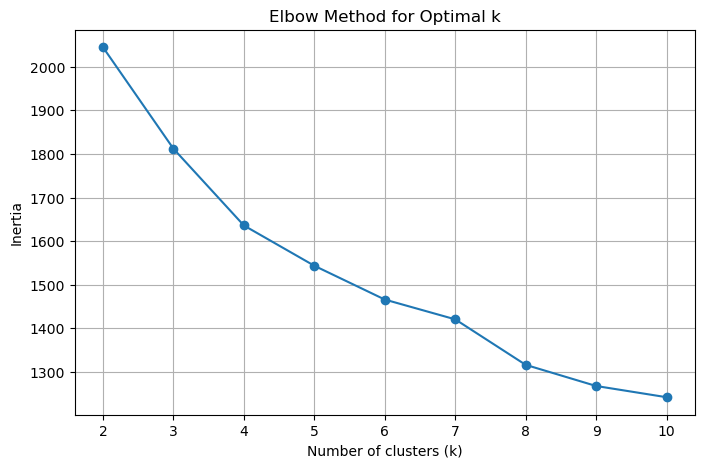

k = 2: 2044
k = 3: 1812
k = 4: 1635
k = 5: 1543
k = 6: 1466
k = 7: 1420
k = 8: 1316
k = 9: 1267
k = 10: 1241


In [81]:
# Applying quality metric 
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
for k, val in zip(range(2, 11), inertia):
    print(f"k = {k}: {int(val)}")

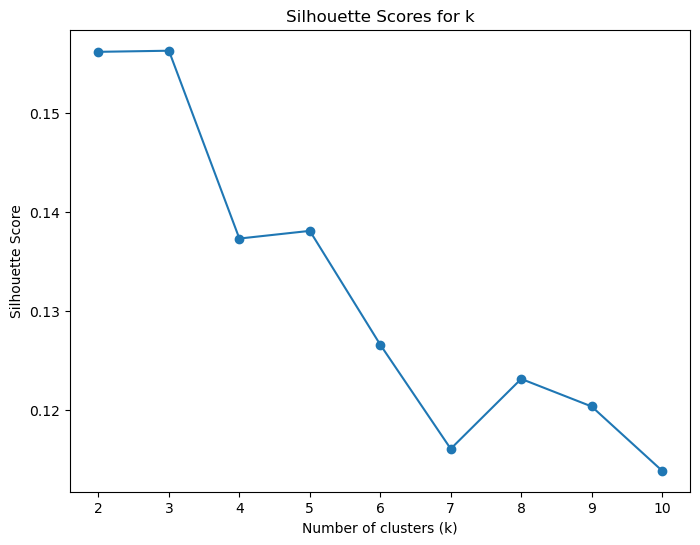

k = 2: 0.156
k = 3: 0.156
k = 4: 0.137
k = 5: 0.138
k = 6: 0.127
k = 7: 0.116
k = 8: 0.123
k = 9: 0.120
k = 10: 0.114


In [83]:
# Store silhouette scores for each k
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(8,6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"k = {k}: {score:.3f}")

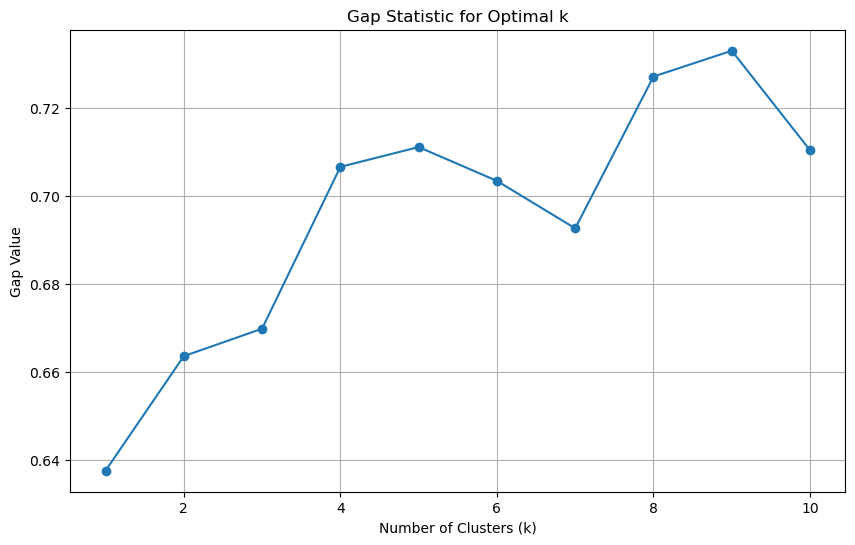

k = 1: 0.638
k = 2: 0.664
k = 3: 0.670
k = 4: 0.707
k = 5: 0.711
k = 6: 0.703
k = 7: 0.693
k = 8: 0.727
k = 9: 0.733
k = 10: 0.710


In [85]:
# Gap statistic
# Gap Statistic function 
def compute_gap_statistic(data, n_refs=10, max_k=10):
    shape = data.shape
    tops = data.max(axis=0)
    bottoms = data.min(axis=0)
    gaps = np.zeros(max_k)

    for k in range(1, max_k + 1):
        # Real data inertia
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(data)
        disp = km.inertia_

        # Reference data inertia
        ref_disps = np.zeros(n_refs)
        for i in range(n_refs):
            random_data = np.random.uniform(bottoms, tops, size=shape)
            km.fit(random_data)
            ref_disps[i] = km.inertia_

        # Gap value
        gap = np.log(np.mean(ref_disps)) - np.log(disp)
        gaps[k - 1] = gap

    return gaps

# 3. Run the function
gap_values = compute_gap_statistic(scaled_data, n_refs=10, max_k=10)

# 4. Plot the gap statistic
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), gap_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Value')
plt.title('Gap Statistic for Optimal k')
plt.grid(True)
plt.show()
for k, gap in zip(range(1, 11), gap_values):
    print(f"k = {k}: {gap:.3f}")

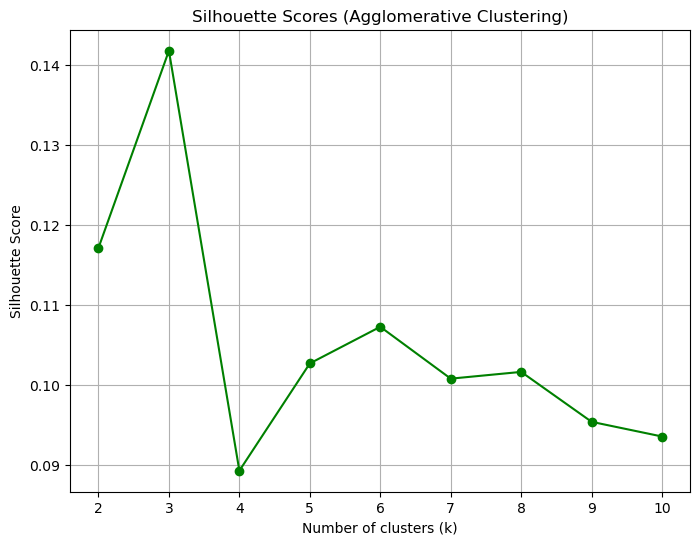

k = 2: 0.117
k = 3: 0.142
k = 4: 0.089
k = 5: 0.103
k = 6: 0.107
k = 7: 0.101
k = 8: 0.102
k = 9: 0.095
k = 10: 0.094


In [87]:
# Store silhouette scores for each k
agglo_silhouette_scores = []

for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k)
    labels = agglo.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    agglo_silhouette_scores.append(score)

# Plotting silhouette scores
plt.figure(figsize=(8,6))
plt.plot(range(2, 11), agglo_silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores (Agglomerative Clustering)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
for k, score in zip(range(2, 11), agglo_silhouette_scores):
    print(f"k = {k}: {score:.3f}")

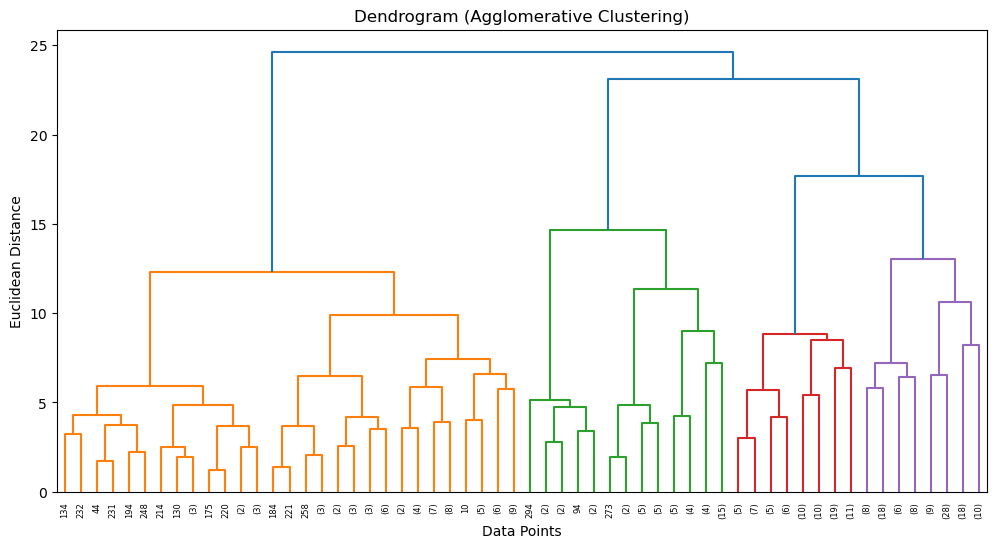

In [28]:
# Compute the linkage matrix
linked = sch.linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linked, truncate_mode='level', p=5)  # p controls how many levels to show
plt.title('Dendrogram (Agglomerative Clustering)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

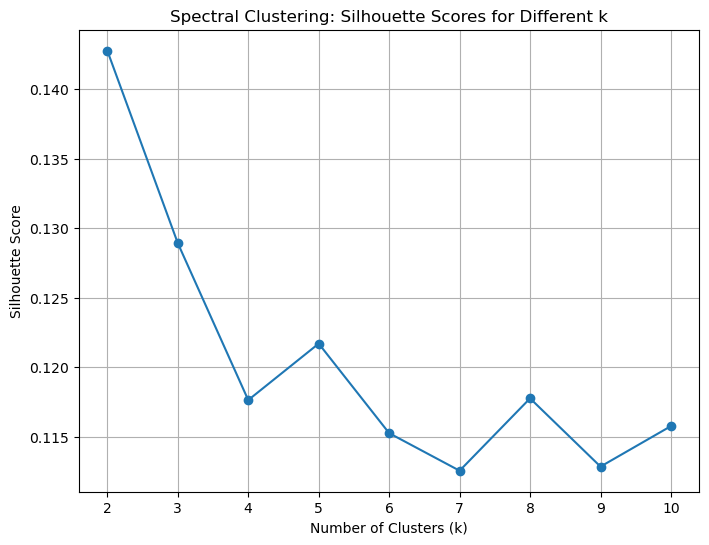

k = 2: 0.143
k = 3: 0.129
k = 4: 0.118
k = 5: 0.122
k = 6: 0.115
k = 7: 0.113
k = 8: 0.118
k = 9: 0.113
k = 10: 0.116


In [89]:
# Store silhouette scores for each k
silhouette_scores_spectral = []

# Try cluster numbers from 2 to 10
for k in range(2, 11):
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
    labels = spectral.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores_spectral.append(score)

# Plot silhouette scores
plt.figure(figsize=(8,6))
plt.plot(range(2, 11), silhouette_scores_spectral, marker='o')
plt.title('Spectral Clustering: Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
for k, score in zip(range(2, 11), silhouette_scores_spectral):
    print(f"k = {k}: {score:.3f}")

In [30]:
# Trying out clusters
k_final = 3 

In [31]:
# Fit the model with the chosen number of clusters
kmeans = KMeans(n_clusters=k_final, random_state=42)
analysis_df["cluster"] = kmeans.fit_predict(scaled_data)

In [32]:
cluster_profiles = analysis_df.groupby("cluster").mean(numeric_only=True)
print(cluster_profiles)

          PINV_av  anonymity_score  TRUST_av   FALS_av  TOOLS_av  EMO_POS_av  \
cluster                                                                        
0        2.991150         4.017699  3.774336  1.736726  3.837168    4.305310   
1        4.706204         3.916058  4.755474  2.576642  4.859854    2.945255   
2        4.732456         4.982456  4.162281  2.280702  5.424561    5.697368   

         EMO_NEG_av  DISCONT_av  
cluster                          
0          2.061947    2.619469  
1          3.806569    3.271898  
2          2.118421    4.065789  


In [33]:
# Quick check
analysis_df

PINV_av  anonymity_score  TRUST_av  FALS_av  TOOLS_av  EMO_POS_av  \
0       5.00             4.25      2.00     2.00       5.6        3.25   
1       6.25             3.75      6.75     3.75       6.2        1.50   
2       2.50             3.50      3.75     3.00       3.8        4.00   
3       4.75             4.00      4.50     2.00       4.6        4.00   
4       4.25             4.00      4.00     2.00       3.8        1.50   
..       ...              ...       ...      ...       ...         ...   
302     2.25             4.00      4.50     2.00       2.6        4.00   
303     5.50             4.00      4.00     4.25       5.8        1.75   
304     5.50             4.25      4.50     3.00       4.6        2.00   
305     3.50             4.00      3.50     2.00       2.6        4.00   
306     5.50             3.50      4.75     2.00       5.0        2.75   

     EMO_NEG_av  DISCONT_av  cluster  
0          2.75        3.75        2  
1          5.50        3.75        1  
2          4.00        3.25        0  
3          4.75        2.00        1  
4          1.25        3.75        0  
..          ...         ...      ...  
302        4.25        4.00        0  
303        5.75        4.50        1  
304        4.75        3.00        1  
305        1.00        3.00        0  
306        4.50        4.25        1  

[307 rows x 9 columns]

## Step 4.7: Cluster Profiling and Correlation Analysis

After assigning each participant to a cluster, we profile the clusters in terms of:
- **Composite variables** (privacy invasion, anonymity, trust, false info sharing, tools, emotions, churn intention).  
- **Demographics** (gender, country, age).  

This helps to interpret the behavioral meaning of each cluster and link them to churn risk.

We then extend the analysis with:
- **Correlation matrices per cluster**: reveal how relationships between variables differ across groups.  
- **Demographic breakdowns**: counts and percentages of gender and country inside each cluster.  
- **Age statistics**: mean, standard deviation, and range for each cluster.  

This provides both a descriptive and relational understanding of the clusters.

In [35]:
# Merge demographics into analysis_df

analysis_df["SEX"] = df["SEX"]
analysis_df["COUNTRY"] = df["COUNTRY"]

In [36]:
# Gender distribution per cluster
gender_distribution = analysis_df.groupby("cluster")["SEX"].value_counts(normalize=True).unstack()
print(gender_distribution)

# Country distribution per cluster
country_distribution = analysis_df.groupby("cluster")["COUNTRY"].value_counts(normalize=True).unstack()
print(country_distribution)

SEX           0.0       1.0
cluster                    
0        0.504425  0.495575
1        0.489051  0.510949
2        0.385965  0.614035
COUNTRY       0.0       1.0
cluster                    
0        0.433628  0.566372
1        0.350365  0.649635
2        0.701754  0.298246


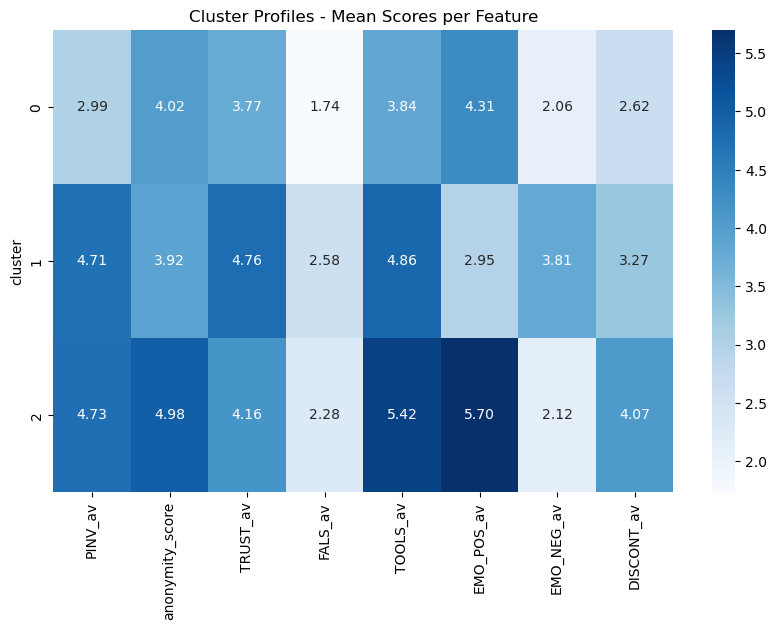

In [37]:
# # Heatmap of cluster profiles
plt.figure(figsize=(10,6))
sns.heatmap(cluster_profiles, annot=True, cmap="Blues", fmt=".2f")
plt.title("Cluster Profiles - Mean Scores per Feature")
plt.show()

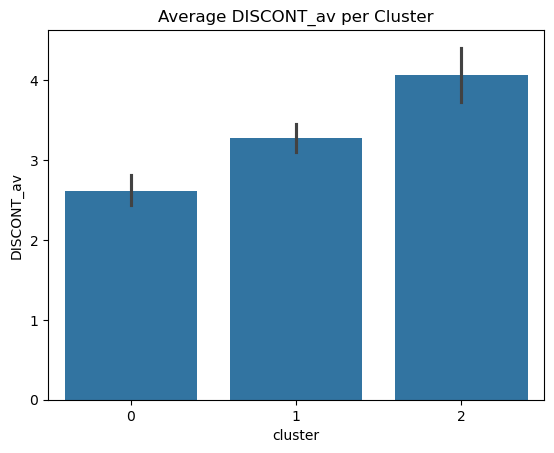

In [38]:
# Barplot for DISCONT_av mean by cluster
sns.barplot(data=analysis_df, x="cluster", y="DISCONT_av", estimator="mean")
plt.title("Average DISCONT_av per Cluster")
plt.show()

In [39]:
# Cluster description
cluster_profiles

PINV_av  anonymity_score  TRUST_av   FALS_av  TOOLS_av  EMO_POS_av  \
cluster                                                                        
0        2.991150         4.017699  3.774336  1.736726  3.837168    4.305310   
1        4.706204         3.916058  4.755474  2.576642  4.859854    2.945255   
2        4.732456         4.982456  4.162281  2.280702  5.424561    5.697368   

         EMO_NEG_av  DISCONT_av  
cluster                          
0          2.061947    2.619469  
1          3.806569    3.271898  
2          2.118421    4.065789

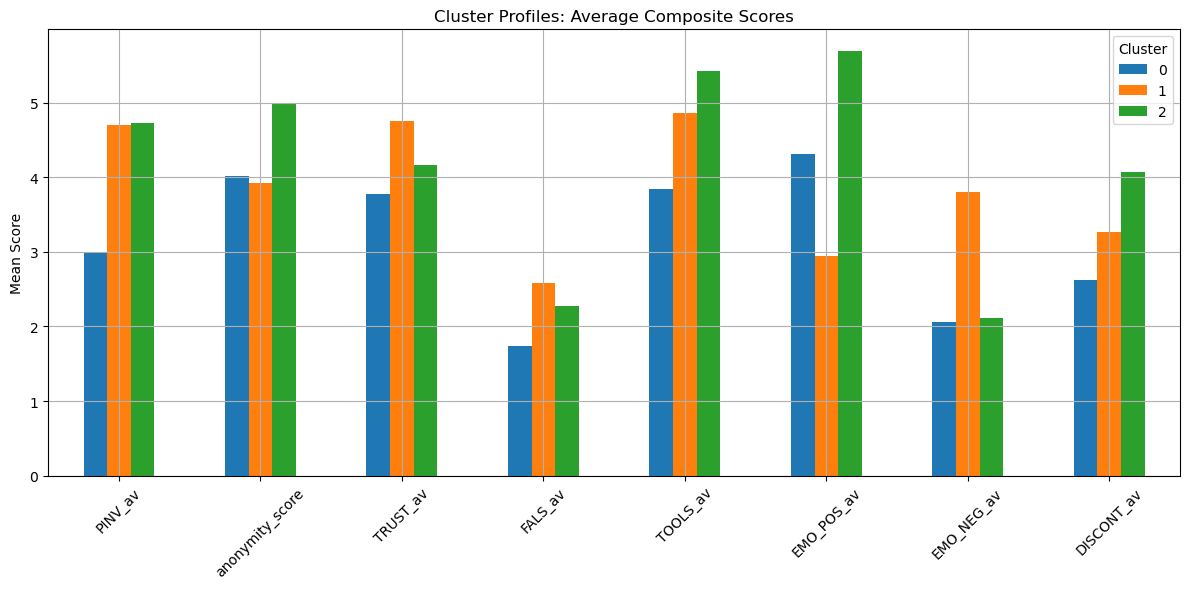

In [40]:
# # Barplot of all composite scores per cluster
cluster_profiles.T.plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Profiles: Average Composite Scores')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [41]:
# Number of participants in each cluster
analysis_df['cluster'].value_counts()

cluster
1    137
0    113
2     57
Name: count, dtype: int64

In [42]:
# Merge demographic variables from df to analysis_df
analysis_df['AGE'] = df['AGE']

# Stats for Cluster 0
cluster0_age = analysis_df[analysis_df['cluster'] == 0]['AGE']
print("Mean age:", cluster0_age.mean())
print("Standard Deviation:", cluster0_age.std())
print("Age range:", cluster0_age.min(), "-", cluster0_age.max())

Mean age: 42.52212389380531
Standard Deviation: 13.504693195550272
Age range: 22.0 - 80.0


In [43]:
# Merge demographic variables from df to analysis_df
analysis_df['AGE'] = df['AGE']

# Age stats for Cluster 0
cluster0_age = analysis_df[analysis_df['cluster'] == 0]['AGE']
print("Mean age:", cluster0_age.mean())
print("Standard Deviation:", cluster0_age.std())
print("Age range:", cluster0_age.min(), "-", cluster0_age.max())

Mean age: 42.52212389380531
Standard Deviation: 13.504693195550272
Age range: 22.0 - 80.0


In [44]:
# Age stats for Cluster 1
cluster1_age = analysis_df[analysis_df['cluster'] == 1]['AGE']
print("Mean age:", cluster1_age.mean())
print("Standard Deviation:", cluster1_age.std())
print("Age range:", cluster1_age.min(), "-", cluster1_age.max())

Mean age: 42.722627737226276
Standard Deviation: 12.259887922316198
Age range: 18.0 - 75.0


In [45]:
# Age stats for Cluster 2
cluster2_age = analysis_df[analysis_df['cluster'] == 2]['AGE']
print("Mean age:", cluster2_age.mean())
print("Standard Deviation:", cluster2_age.std())
print("Age range:", cluster2_age.min(), "-", cluster2_age.max())

Mean age: 37.80701754385965
Standard Deviation: 12.964840636576662
Age range: 21.0 - 73.0


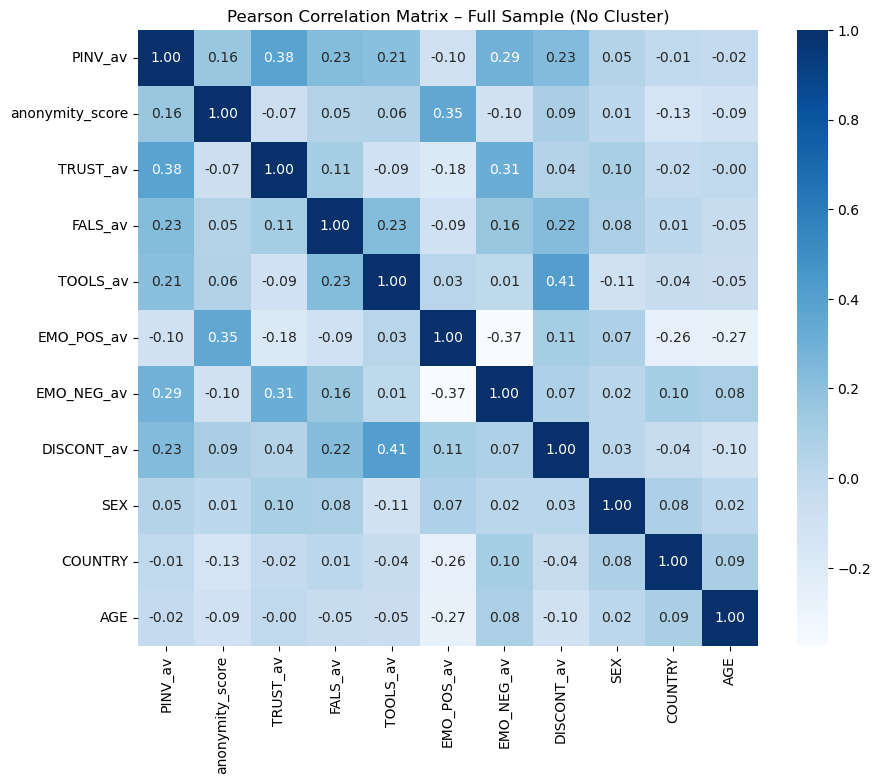

In [46]:
# Correlation matrix for the full sample (excluding cluster variable)
plt.figure(figsize=(10, 8))
sns.heatmap(analysis_df.drop(columns=['cluster']).corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Pearson Correlation Matrix – Full Sample (No Cluster)')
plt.show()

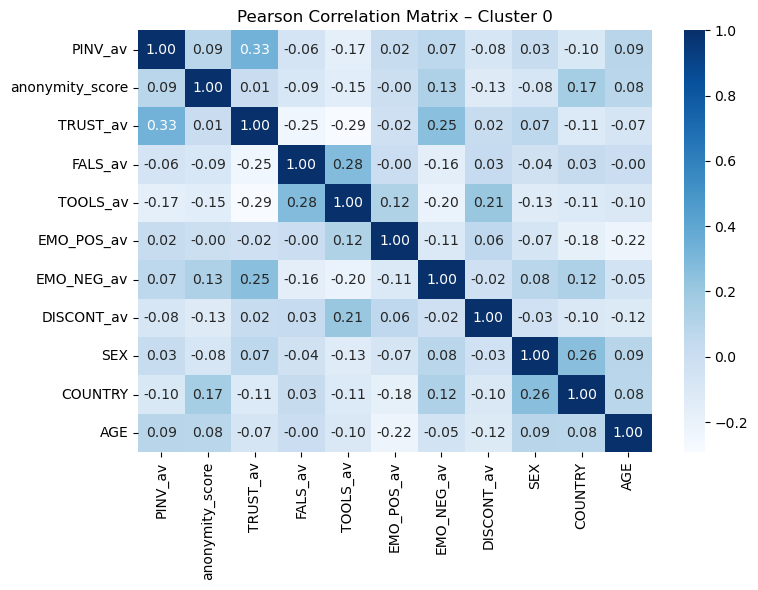

In [47]:
# Variables included in cluster-specific correlations
variables_to_correlate = ['PINV_av', 'anonymity_score', 'TRUST_av', 'FALS_av',
                          'TOOLS_av', 'EMO_POS_av', 'EMO_NEG_av', 'DISCONT_av', 'SEX', 'COUNTRY', 'AGE']

# Cluster 0 correlation matrix
cluster_0_data = analysis_df[analysis_df['cluster'] == 0][variables_to_correlate]
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_0_data.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Pearson Correlation Matrix – Cluster 0')
plt.tight_layout()
plt.show()

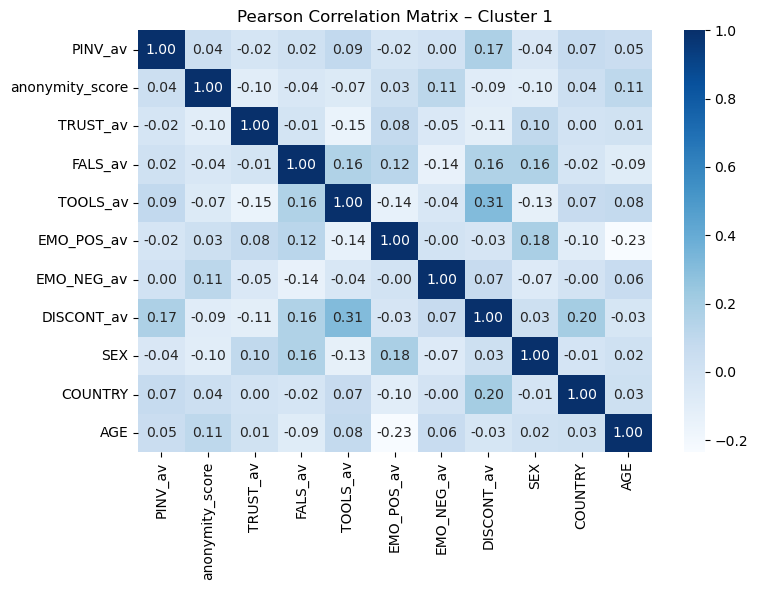

In [48]:
# Cluster 1 correlation matrix
cluster_1_data = analysis_df[analysis_df['cluster'] == 1][variables_to_correlate]
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_1_data.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Pearson Correlation Matrix – Cluster 1')
plt.tight_layout()
plt.show()

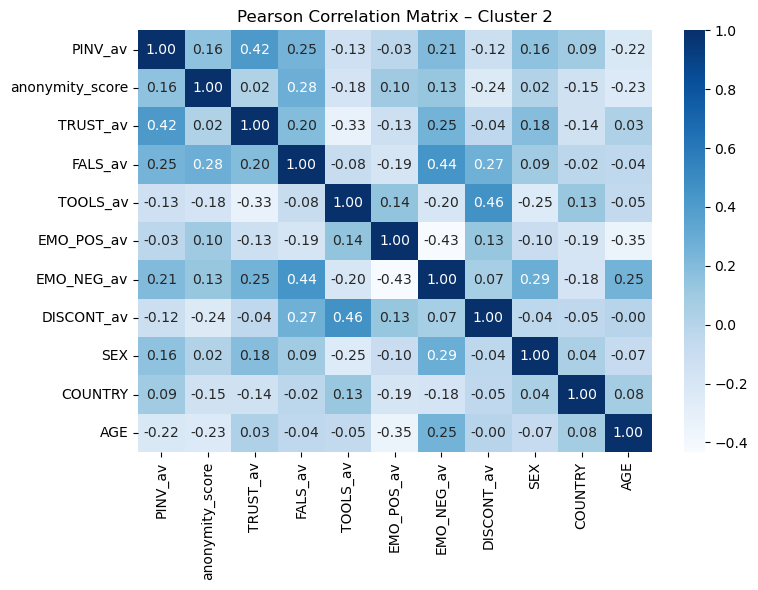

In [49]:
# Cluster 2 correlation matrix
cluster_2_data = analysis_df[analysis_df['cluster'] == 2][variables_to_correlate]
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_2_data.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Pearson Correlation Matrix – Cluster 2')
plt.tight_layout()
plt.show()

In [50]:
# Cluster 0 demographic breakdown
gender_counts0 = cluster_0_data["SEX"].value_counts()
gender_percent0 = cluster_0_data["SEX"].value_counts(normalize=True) * 100
country_counts0 = cluster_0_data["COUNTRY"].value_counts()
country_percent0 = cluster_0_data["COUNTRY"].value_counts(normalize=True) * 100
print("Country Counts:")
print(country_counts0)
print("\nCountry Percentage:")
print(country_percent0)
print("Gender Counts:")
print(gender_counts0)
print("\nGender Percentage:")
print(gender_percent0)

Country Counts:
COUNTRY
1.0    64
0.0    49
Name: count, dtype: int64

Country Percentage:
COUNTRY
1.0    56.637168
0.0    43.362832
Name: proportion, dtype: float64
Gender Counts:
SEX
0.0    57
1.0    56
Name: count, dtype: int64

Gender Percentage:
SEX
0.0    50.442478
1.0    49.557522
Name: proportion, dtype: float64


In [51]:
# Cluster 1 demographic breakdown
gender_counts1 = cluster_1_data["SEX"].value_counts()
gender_percent1 = cluster_1_data["SEX"].value_counts(normalize=True) * 100
country_counts1 = cluster_1_data["COUNTRY"].value_counts()
country_percent1 = cluster_1_data["COUNTRY"].value_counts(normalize=True) * 100
print("Country Counts:")
print(country_counts1)
print("\nCountry Percentage:")
print(country_percent1)
print("Gender Counts:")
print(gender_counts1)
print("\nGender Percentage:")
print(gender_percent1)

Country Counts:
COUNTRY
1.0    89
0.0    48
Name: count, dtype: int64

Country Percentage:
COUNTRY
1.0    64.963504
0.0    35.036496
Name: proportion, dtype: float64
Gender Counts:
SEX
1.0    70
0.0    67
Name: count, dtype: int64

Gender Percentage:
SEX
1.0    51.094891
0.0    48.905109
Name: proportion, dtype: float64


In [52]:
# Cluster 2 demographic breakdown
gender_counts2 = cluster_2_data["SEX"].value_counts()
gender_percent2 = cluster_2_data["SEX"].value_counts(normalize=True) * 100
country_counts2 = cluster_2_data["COUNTRY"].value_counts()
country_percent2 = cluster_2_data["COUNTRY"].value_counts(normalize=True) * 100
print("Country Counts:")
print(country_counts2)
print("\nCountry Percentage:")
print(country_percent2)
print("Gender Counts:")
print(gender_counts2)
print("\nGender Percentage:")
print(gender_percent2)

Country Counts:
COUNTRY
0.0    40
1.0    17
Name: count, dtype: int64

Country Percentage:
COUNTRY
0.0    70.175439
1.0    29.824561
Name: proportion, dtype: float64
Gender Counts:
SEX
1.0    35
0.0    22
Name: count, dtype: int64

Gender Percentage:
SEX
1.0    61.403509
0.0    38.596491
Name: proportion, dtype: float64


# 📉 Principal Component Analysis (PCA) for Cluster Visualization

To better understand the clustering structure, we apply **Principal Component Analysis (PCA)** to reduce the high-dimensional feature space into **2D** and **3D representations**.

---

## 🔹 Steps

1. **Feature Selection**
   - Exclude non-feature columns: `cluster`, `SEX`, `COUNTRY`, and `AGE`.
   - Use only relevant numerical features for PCA.

2. **PCA Transformation**
   - Perform PCA with **2 components** (`pca_2d`) for 2D visualization.
   - Perform PCA with **3 components** (`pca_3d`) for 3D visualization.

3. **Cluster Coloring**
   - Assign a consistent color to each cluster using the `tab10` colormap.
   - Ensures that the same cluster has the same color across 2D and 3D plots.

---

## 🔹 Visualizations

### 1️⃣ 2D PCA Scatter Plot
- Plots clusters on the first two principal components (`PCA1` vs `PCA2`).
- Allows a quick check of separation between clusters in 2D space.

### 2️⃣ 3D PCA Scatter Plot
- Extends visualization into three dimensions (`PCA1`, `PCA2`, `PCA3`).
- Provides a more detailed look at how clusters are distributed in reduced feature space.

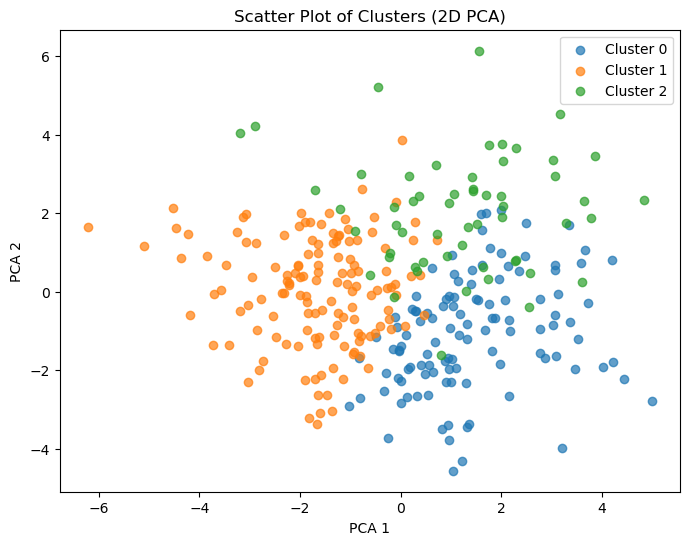

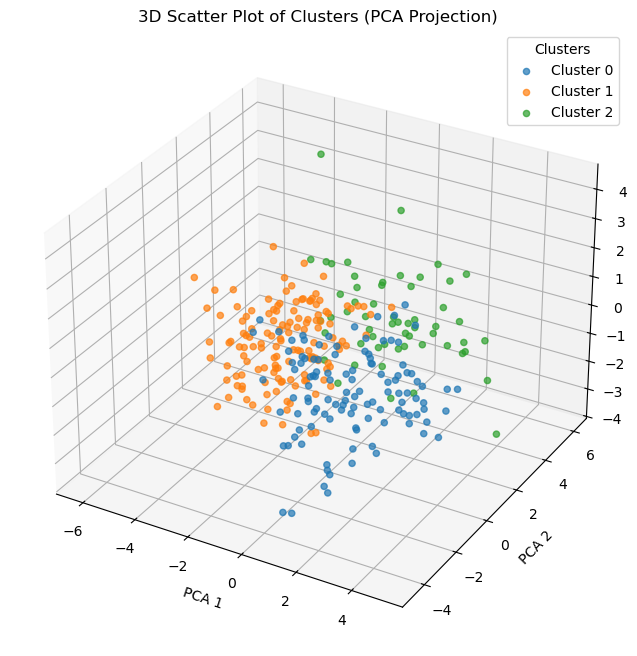

In [75]:
# Run PCA on features only (exclude non-feature columns)
features1 = analysis_df.drop(columns=['cluster', 'SEX', 'COUNTRY', 'AGE'])

pca_2d = PCA(n_components=2)
coords_2d = pca_2d.fit_transform(features1)

pca_3d = PCA(n_components=3)
coords_3d = pca_3d.fit_transform(features1)

# Define cluster colors
palette = plt.get_cmap("tab10")
cluster_colors = {cid: palette(i) for i, cid in enumerate(sorted(analysis_df['cluster'].unique()))}

# 2D PCA Plot
plt.figure(figsize=(8,6))
for cluster_id in sorted(analysis_df['cluster'].unique()):
    subset = coords_2d[analysis_df['cluster'] == cluster_id]
    plt.scatter(subset[:,0], subset[:,1],
                label=f'Cluster {cluster_id}',
                color=cluster_colors[cluster_id], alpha=0.7)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Scatter Plot of Clusters (2D PCA)")
plt.legend()
plt.show()

# 3D PCA Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

for cluster_id in sorted(analysis_df['cluster'].unique()):
    subset = coords_3d[analysis_df['cluster'] == cluster_id]
    ax.scatter(subset[:,0], subset[:,1], subset[:,2],
               label=f"Cluster {cluster_id}",
               color=cluster_colors[cluster_id], alpha=0.7)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D Scatter Plot of Clusters (PCA Projection)")
ax.legend(title="Clusters")
plt.show()

# 📊 Machine Learning Models for Churn Prediction

This notebook explores different machine learning models to predict churn intention based on survey/behavioral features.  
The workflow includes **Logistic Regression (baseline + optimized)**, **Random Forest**, **XGBoost**, and a **Multi-Layer Perceptron (MLP)**.

---

## 1. Logistic Regression

### 1.1 Data Preparation
- Binarize churn intention (`DISCONT_av >= 4.0` → churn = 1).
- Select relevant features.
- One-hot encode categorical variables (e.g., `COUNTRY`).
- Train/test split (70/30).

### 1.2 Logistic Regression (Baseline)
- Train logistic regression model.
- Evaluate with precision, recall, F1, and ROC-AUC.
- Compute **odds ratios** for interpretability.

### 1.3 Logistic Regression (Optimized)
- Train logistic regression with `class_weight="balanced"`.
- Perform **threshold tuning** (0.1–0.9) to maximize F1.
- Evaluate with optimized precision, recall, F1, and ROC-AUC.
- Visualizations:
  - Confusion Matrix (heatmap)
  - ROC Curve
  - Odds Ratios (bar plot)

---

## 2. Random Forest

### 2.1 Baseline Model
- Train a Random Forest classifier (`n_estimators=200`).
- Evaluate precision, recall, F1, ROC-AUC.
- Extract feature importances.

### 2.2 Optimized Threshold
- Tune decision threshold to maximize F1.
- Re-evaluate metrics.
- Visualize **feature importance** using a horizontal bar chart.

---

## 3. XGBoost Classifier

### 3.1 Baseline Model
- Train XGBoost with imbalance handling (`scale_pos_weight`).
- Evaluate precision, recall, F1, ROC-AUC.
- Show confusion matrix.

### 3.2 Optimized Threshold
- Perform threshold tuning (maximize F1).
- Recalculate metrics.
- Visualize **feature importance** (bar plot).

---

## 4. Multi-Layer Perceptron (MLP)

### 4.1 Model Setup
- Architecture: 4 hidden layers (64 → 32 → 16 → 8 neurons).
- Activation: ReLU, Optimizer: Adam, Regularization: L2.
- Train for max 500 iterations.

### 4.2 Optimized Threshold
- Tune probability threshold for best F1.
- Evaluate precision, recall, F1, ROC-AUC.
- Show confusion matrix.

---

## 📈 Summary

This notebook demonstrates:
- Logistic Regression (baseline + optimized)
- Random Forest (baseline + optimized)
- XGBoost (baseline + optimized)
- Multi-Layer Perceptron (optimized)

Evaluation is based on **precision, recall, F1 score, and ROC-AUC**.  
Threshold tuning was performed for most models to maximize F1, balancing false positives and false negatives.


In [54]:
# Logistic regression

# Binarize churn intention (choose threshold, e.g., DISCONT_av >= 4.0 means likely churn)
analysis_df['churn_binary'] = (analysis_df['DISCONT_av'] >= 4.0).astype(int)

# Prepare features and target variable
features = ['PINV_av', 'anonymity_score', 'TRUST_av', 'FALS_av', 'TOOLS_av', 
            'EMO_POS_av', 'EMO_NEG_av', 'SEX', 'COUNTRY', 'AGE']
X = analysis_df[features]
y = analysis_df['churn_binary']

# Convert categorical features to dummy variables (example for COUNTRY)
X = pd.get_dummies(X, columns=['COUNTRY'], drop_first=True)

# Split data into train and test sets (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# continued: Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate odds ratios from model coefficients
odds_ratios = np.exp(model.coef_[0])

print(f'Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}, ROC-AUC: {roc_auc:.3f}')
print('Odds Ratios for each feature:')
for feature, or_value in zip(X.columns, odds_ratios):
    print(f'{feature}: {or_value:.3f}')

Precision: 0.538, Recall: 0.250, F1 Score: 0.341, ROC-AUC: 0.680
Odds Ratios for each feature:
PINV_av: 1.329
anonymity_score: 0.979
TRUST_av: 1.042
FALS_av: 1.105
TOOLS_av: 1.705
EMO_POS_av: 1.618
EMO_NEG_av: 1.192
SEX: 0.621
AGE: 0.999
COUNTRY_1.0: 1.328


In [55]:
# Logistic regression(optimized)

# Train logistic regression with class balancing 
model_bal = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)
model_bal.fit(X_train, y_train)

# Predict probabilities 
y_prob_bal = model_bal.predict_proba(X_test)[:, 1]

# Find best threshold for F1 
thresholds = np.linspace(0.1, 0.9, 81)
best_thr = 0.5
best_f1 = 0

for thr in thresholds:
    y_pred_thr = (y_prob_bal >= thr).astype(int)
    f1_opt = f1_score(y_test, y_pred_thr)
    if f1_opt > best_f1:
        best_f1 = f1_opt
        best_thr = thr

print(f"Best threshold: {best_thr:.2f}, Best F1: {best_f1:.3f}")

# Final predictions with best threshold 
y_pred_bal = (y_prob_bal >= best_thr).astype(int)

# Evaluate 
precision_opt = precision_score(y_test, y_pred_bal)
recall_opt = recall_score(y_test, y_pred_bal)
f1_opt = f1_score(y_test, y_pred_bal)
roc_auc_opt = roc_auc_score(y_test, y_prob_bal)

print(f"Precision: {precision_opt:.3f}, Recall: {recall_opt:.3f}, F1 Score: {f1_opt:.3f}, ROC-AUC: {roc_auc_opt:.3f}")

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_bal)
print("Confusion Matrix:\n", cm)

Best threshold: 0.35, Best F1: 0.556
Precision: 0.403, Recall: 0.893, F1 Score: 0.556, ROC-AUC: 0.677
Confusion Matrix:
 [[28 37]
 [ 3 25]]


In [56]:
# Visualisation for logistic regression(optimized)

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_bal)
cm_labels = np.array([["TN","FP"],["FN","TP"]])
z_text = [[f"{label}<br>{val}" for label,val in zip(row_lab,row)] 
          for row_lab,row in zip(cm_labels, cm)]

fig_cm = ff.create_annotated_heatmap(
    z=cm, x=["Predicted 0","Predicted 1"], y=["Actual 0","Actual 1"],
    annotation_text=z_text, colorscale="Blues", showscale=True)
fig_cm.update_layout(title="Confusion Matrix")
fig_cm.show()

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_prob_bal)
roc_auc_opt = roc_auc_score(y_test, y_prob_bal)
fig_roc = px.area(
    x=fpr, y=tpr,
    title=f"ROC Curve (AUC = {roc_auc_opt:.3f})",
    labels=dict(x="False Positive Rate", y="True Positive Rate"),
    width=600, height=400
)
fig_roc.add_shape(
    type="line", line=dict(dash="dash"),
    x0=0, x1=1, y0=0, y1=1
)
fig_roc.show()

# --- Odds Ratios Barplot ---
odds_ratios = np.exp(model_bal.coef_[0])
feature_names = X_train.columns
feature_importance = pd.Series(odds_ratios, index=feature_names).sort_values()

fig_or = px.bar(
    feature_importance,
    orientation="h",
    title="Odds Ratios (Churn Predictors)",
    labels={"value":"Odds Ratio", "index":"Feature"}
)
fig_or.update_layout(showlegend=False)
fig_or.add_vline(x=1, line_dash="dash", line_color="red")
fig_or.show()

# --- Print Metrics ---
print(f"Precision: {precision_opt:.3f}")
print(f"Recall: {recall_opt:.3f}")
print(f"F1 Score: {f1_opt:.3f}")
print(f"ROC-AUC: {roc_auc_opt:.3f}")
print(f"Best Threshold: {best_thr:.3f}")

Precision: 0.403
Recall: 0.893
F1 Score: 0.556
ROC-AUC: 0.677
Best Threshold: 0.350


In [57]:
# Random forest

# Train/test split (we already did this)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=None,        # tree depth (can be limited, e.g., max_depth=5)
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Random Forest Results:")
print(f"Precision: {precision_rf:.3f}, Recall: {recall_rf:.3f}, F1: {f1_rf:.3f}, ROC-AUC: {roc_auc_rf:.3f}")

# Feature importance
importances = rf_model.feature_importances_
feature_importance = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

print("\nFeature Importances:")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.3f}")

Random Forest Results:
Precision: 0.667, Recall: 0.214, F1: 0.324, ROC-AUC: 0.687

Feature Importances:
TOOLS_av: 0.179
AGE: 0.138
EMO_POS_av: 0.131
PINV_av: 0.126
FALS_av: 0.122
EMO_NEG_av: 0.094
TRUST_av: 0.084
anonymity_score: 0.077
COUNTRY_1.0: 0.026
SEX: 0.024


In [58]:
# Random Forest with Threshold Tuning 

# Predict probabilities
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Find best threshold for F1
thresholds = np.linspace(0.1, 0.9, 81)
best_thr_rf = 0.5
best_f1_rf = 0

for thr in thresholds:
    y_pred_thr = (y_prob_rf >= thr).astype(int)
    f1_rf_opt = f1_score(y_test, y_pred_thr)
    if f1_rf_opt > best_f1_rf:
        best_f1_rf = f1_rf_opt
        best_thr_rf = thr

# Final predictions with best threshold
y_pred_rf_optimized = (y_prob_rf >= best_thr_rf).astype(int)

# Calculate optimized metrics
precision_rf_opt = precision_score(y_test, y_pred_rf_optimized)
recall_rf_opt = recall_score(y_test, y_pred_rf_optimized)
f1_rf_opt = f1_score(y_test, y_pred_rf_optimized)
roc_auc_rf_opt = roc_auc_score(y_test, y_pred_rf_optimized)

print("="*50)
print("RANDOM FOREST (OPTIMIZED THRESHOLD):")
print("="*50)
print(f"Best threshold: {best_thr_rf:.3f}")
print(f"Precision: {precision_rf_opt:.3f}")
print(f"Recall: {recall_rf_opt:.3f}")
print(f"F1 Score: {f1_rf_opt:.3f}")
print(f"ROC-AUC: {roc_auc_rf_opt:.3f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf_optimized)}")

RANDOM FOREST (OPTIMIZED THRESHOLD):
Best threshold: 0.260
Precision: 0.465
Recall: 0.714
F1 Score: 0.563
ROC-AUC: 0.680
Confusion Matrix:
[[42 23]
 [ 8 20]]


In [59]:
# Feature Importance (Random Forest Optimized)
importances_rf = rf_model.feature_importances_

# Put into a DataFrame
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_rf
}).sort_values('Importance', ascending=True)

# Plot with Plotly
fig_importance_rf = px.bar(
    feature_importance_rf,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Random Forest (Optimized) - Feature Importance',
    labels={'Importance': 'Importance Score', 'Feature': 'Feature'}
)
fig_importance_rf.show()

In [60]:
# XGBoost Classifier

# Calculate class weight ratio for imbalance handling
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate metrics
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Print results
print("="*50)
print("XGBOOST RESULTS:")
print("="*50)
print(f"Precision: {precision_xgb:.3f}")
print(f"Recall: {recall_xgb:.3f}")
print(f"F1 Score: {f1_xgb:.3f}")
print(f"ROC-AUC: {roc_auc_xgb:.3f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_xgb)}")

XGBOOST RESULTS:
Precision: 0.481
Recall: 0.464
F1 Score: 0.473
ROC-AUC: 0.685
Confusion Matrix:
[[51 14]
 [15 13]]


In [61]:
# XGBoost with Threshold Tuning 

# Predict probabilities
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Find best threshold for F1
thresholds = np.linspace(0.1, 0.9, 81)
best_thr_xgb = 0.5
best_f1_xgb = 0

for thr in thresholds:
    y_pred_thr = (y_prob_xgb >= thr).astype(int)
    f1_xgb_opt = f1_score(y_test, y_pred_thr)
    if f1_xgb_opt > best_f1_xgb:
        best_f1_xgb = f1_xgb_opt
        best_thr_xgb = thr

# Final predictions with best threshold
y_pred_xgb_optimized = (y_prob_xgb >= best_thr_xgb).astype(int)

# Calculate optimized metrics
precision_xgb_opt = precision_score(y_test, y_pred_xgb_optimized)
recall_xgb_opt = recall_score(y_test, y_pred_xgb_optimized)
f1_xgb_opt = f1_score(y_test, y_pred_xgb_optimized)
roc_auc_xgb_opt = roc_auc_score(y_test, y_pred_xgb_optimized)

print("="*50)
print("XGBOOST (OPTIMIZED THRESHOLD):")
print("="*50)
print(f"Best threshold: {best_thr_xgb:.3f}")
print(f"Precision: {precision_xgb_opt:.3f}")
print(f"Recall: {recall_xgb_opt:.3f}")
print(f"F1 Score: {f1_xgb_opt:.3f}")
print(f"ROC-AUC: {roc_auc_xgb_opt:.3f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_xgb_optimized)}")

XGBOOST (OPTIMIZED THRESHOLD):
Best threshold: 0.400
Precision: 0.514
Recall: 0.679
F1 Score: 0.585
ROC-AUC: 0.701
Confusion Matrix:
[[47 18]
 [ 9 19]]


In [62]:
# Feature Importance (XGBoost Optimized) 
importances_xgb = xgb_model.feature_importances_

# Put into a DataFrame
feature_importance_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_xgb
}).sort_values('Importance', ascending=True)

# Plot with Plotly
fig_importance_xgb = px.bar(
    feature_importance_xgb,
    x='Importance',
    y='Feature',
    orientation='h',
    title='XGBoost (Optimized) - Feature Importance',
    labels={'Importance': 'Importance Score', 'Feature': 'Feature'}
)
fig_importance_xgb.show()

In [63]:
# MULTI LAYER PERCEPTRON

mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16, 8),  # 4 hidden layers: 64 -> 32 -> 16 -> 8 neurons
    activation='relu',                   # activation function
    solver='adam',                       # optimizer
    alpha=0.001,                         # L2 regularization
    learning_rate_init=0.001,            # initial learning rate
    max_iter=500,                        # max number of epochs
    random_state=42
)

# Train the model 
mlp_model.fit(X_train, y_train)

# Predict probabilities 
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Find best threshold for F1 
thresholds = np.linspace(0.1, 0.9, 81)
best_thr_mlp = 0.5
best_f1_mlp = 0

for thr in thresholds:
    y_pred_thr = (y_prob_mlp >= thr).astype(int)
    f1_mlp = f1_score(y_test, y_pred_thr)
    if f1_mlp > best_f1_mlp:
        best_f1_mlp = f1_mlp
        best_thr_mlp = thr

# Final predictions with best threshold 
y_pred_mlp_optimized = (y_prob_mlp >= best_thr_mlp).astype(int)

# Calculate metrics
precision_mlp = precision_score(y_test, y_pred_mlp_optimized)
recall_mlp = recall_score(y_test, y_pred_mlp_optimized)
f1_mlp = f1_score(y_test, y_pred_mlp_optimized)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

# Print results
print("="*50)
print("MULTI-LAYER PERCEPTRON (OPTIMIZED THRESHOLD):")
print("="*50)
print(f"Best threshold: {best_thr_mlp:.3f}")
print(f"Precision: {precision_mlp:.3f}")
print(f"Recall: {recall_mlp:.3f}")
print(f"F1 Score: {f1_mlp:.3f}")
print(f"ROC-AUC: {roc_auc_mlp:.3f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_mlp_optimized)}")

MULTI-LAYER PERCEPTRON (OPTIMIZED THRESHOLD):
Best threshold: 0.240
Precision: 0.389
Recall: 0.750
F1 Score: 0.512
ROC-AUC: 0.604
Confusion Matrix:
[[32 33]
 [ 7 21]]


# 📊 Final Comparative Analysis

After training and optimizing multiple machine learning models, we now compare their performance side by side using **Precision**, **Recall**, **F1 Score**, and **ROC-AUC**.

---

## 📋 Results Table

A summary of all models evaluated:

- **Logistic Regression** (baseline & optimized)
- **Random Forest** (baseline & optimized)
- **XGBoost** (baseline & optimized)
- **Multi-Layer Perceptron (MLP)** (optimized)

The table below shows their performance metrics.

---

## 📊 Visual Comparison

### 1️⃣ F1 Score Comparison
- Highlights the balance between **precision** and **recall**.
- Useful for churn prediction since both false positives and false negatives matter.

### 2️⃣ ROC-AUC Comparison
- Measures the ability of each model to distinguish between churn and non-churn.
- A higher ROC-AUC indicates better discrimination power.

### 3️⃣ Precision Comparison
- Shows how well each model avoids false positives (predicting churn when there isn’t).

### 4️⃣ Recall Comparison
- Shows how well each model captures actual churn cases (avoiding false negatives).

---


In [65]:
# Final Comparative Analysis 
results = {
    'Model': [
        'Logistic Regression', 
        'Logistic Regression (Optimized)', 
        'Random Forest', 
        'Random Forest (Optimized)',
        'XGBoost',
        'XGBoost (Optimized)',
        'MLP (Optimized)'
    ],
    'Precision': [
        precision, 
        precision_opt, 
        precision_rf, 
        precision_rf_opt,
        precision_xgb,
        precision_xgb_opt,
        precision_mlp
    ],
    'Recall': [
        recall, 
        recall_opt, 
        recall_rf, 
        recall_rf_opt,
        recall_xgb,
        recall_xgb_opt, 
        recall_mlp
    ],
    'F1 Score': [
        f1, 
        f1_opt, 
        f1_rf, 
        f1_rf_opt,
        f1_xgb,
        f1_xgb_opt,
        f1_mlp
    ],
    'ROC-AUC': [
        roc_auc, 
        roc_auc_opt, 
        roc_auc_rf, 
        roc_auc_rf_opt,   
        roc_auc_xgb,
        roc_auc_xgb_opt,  
        roc_auc_mlp
    ]
}

results_df = pd.DataFrame(results)

print("="*60)
print("FINAL COMPARATIVE RESULTS:")
print("="*60)
print(results_df.to_string(index=False))

# Barplot for F1 
fig_f1 = px.bar(
    results_df,
    x='Model',
    y='F1 Score',
    title='Model Comparison - F1 Scores',
    color='Model',
    text='F1 Score'
)
fig_f1.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_f1.update_layout(width=800, height=500)
fig_f1.show()

# Barplot for ROC-AUC
fig_auc = px.bar(
    results_df,
    x='Model',
    y='ROC-AUC',
    title='Model Comparison - ROC-AUC Scores',
    color='Model',
    text='ROC-AUC'
)
fig_auc.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_auc.update_layout(width=800, height=500)
fig_auc.show()

# Barplot for Precision
fig_precision = px.bar(
    results_df,
    x='Model',
    y='Precision',
    title='Model Comparison - Precision Scores',
    color='Model',
    text='Precision'
)
fig_precision.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_precision.update_layout(width=800, height=500)
fig_precision.show()

# Barplot for Recall 
fig_recall = px.bar(
    results_df,
    x='Model',
    y='Recall',
    title='Model Comparison - Recall Scores',
    color='Model',
    text='Recall'
)
fig_recall.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_recall.update_layout(width=800, height=500)
fig_recall.show()

FINAL COMPARATIVE RESULTS:
                          Model  Precision   Recall  F1 Score  ROC-AUC
            Logistic Regression   0.538462 0.250000  0.341463 0.679670
Logistic Regression (Optimized)   0.403226 0.892857  0.555556 0.677473
                  Random Forest   0.666667 0.214286  0.324324 0.686538
      Random Forest (Optimized)   0.465116 0.714286  0.563380 0.680220
                        XGBoost   0.481481 0.464286  0.472727 0.685165
            XGBoost (Optimized)   0.513514 0.678571  0.584615 0.700824
                MLP (Optimized)   0.388889 0.750000  0.512195 0.604396
